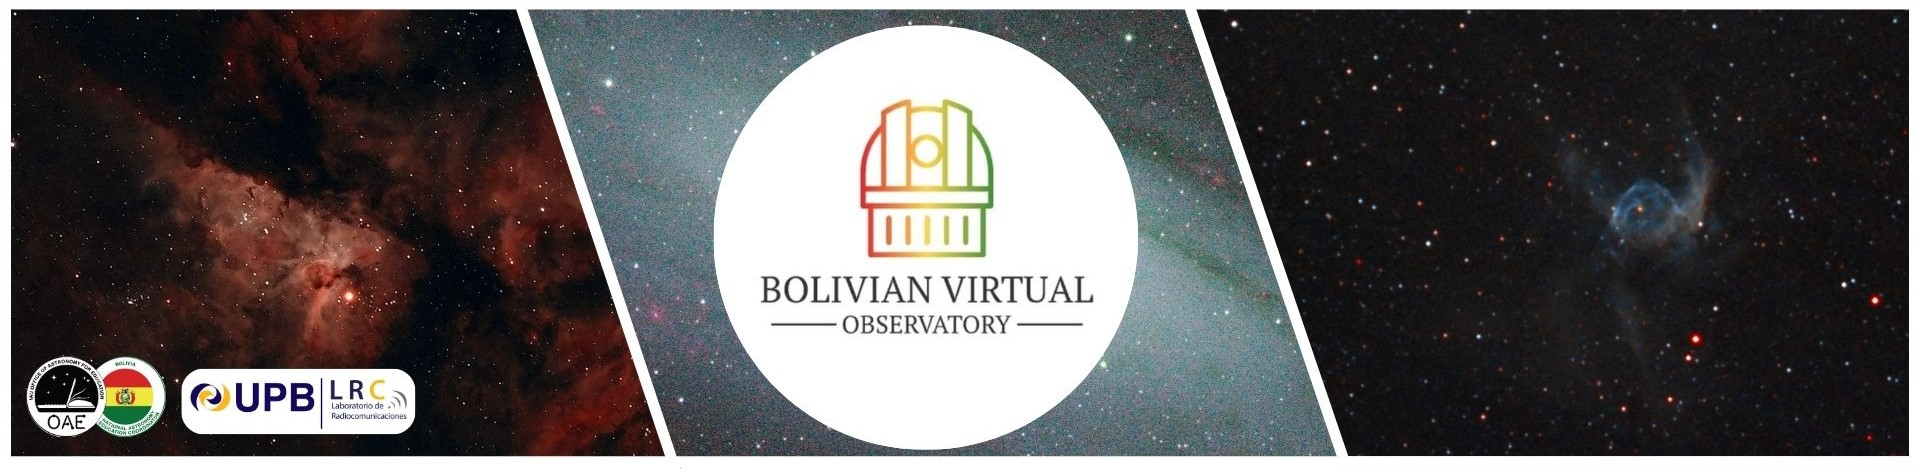

---

**[EN]**  
We present a Jupyter Notebook repository for training programs in the study of transient astronomical phenomena for the Bolivian Virtual Observatory (BVO) project.

The AstroPy package is used in Python 3.0 environments, along with the "Photutils: Photometry Tools" software.  
(Bradley, Larry, et al. Astropy Project. Last modified 2024. [https://photutils.readthedocs.io/en/stable/](https://photutils.readthedocs.io/en/stable/).)

Developed by G. Jaimes (gabrieljaimes@upb.edu) using proprietary metadata from the Bolivian Virtual Observatory (BVO) projected byquirsing the Las Cumbres Observatory (LCO) remote telescope network.  
The use of this repository for commercial purposes or university training is p withohibhout the BVO project's consent.

---

**[ES]**  
Presentamos un repositorio Jupyter Notebook para los programas de capacitación en el estudio de fenómenos astronómicos transitorios para el proyecto Bolivian Virtual Observatory (BVO).

Se utiliza el paquete AstroPy en entornos de Python 3.0, junto con el software "Photutils: Photometry Tools."  
(Bradley, Larry, et al. Astropy Project. Última mo agosto de 2024. [https://photutils.readthedocs.io/en/stable/](https://photutils.readthedocs.io/en/stable/).)

Desarrollado por G. Jaimes (gabrieljaimes@upb.edu) utilizando metadatos propios del proyecto Bolivian Virtual Observatory (BVO), adquiridos con la red de telescopios remotos del Observatorio de Las Cumbres (LCO).  
Está prohibido el uso de este repositorio con fines lucrativos o de formación universitaria sin el consentimiento del proyecto BVO.

---

El flujo del pipeline de este Notebook se 
ontinuación:
:
proyectO.

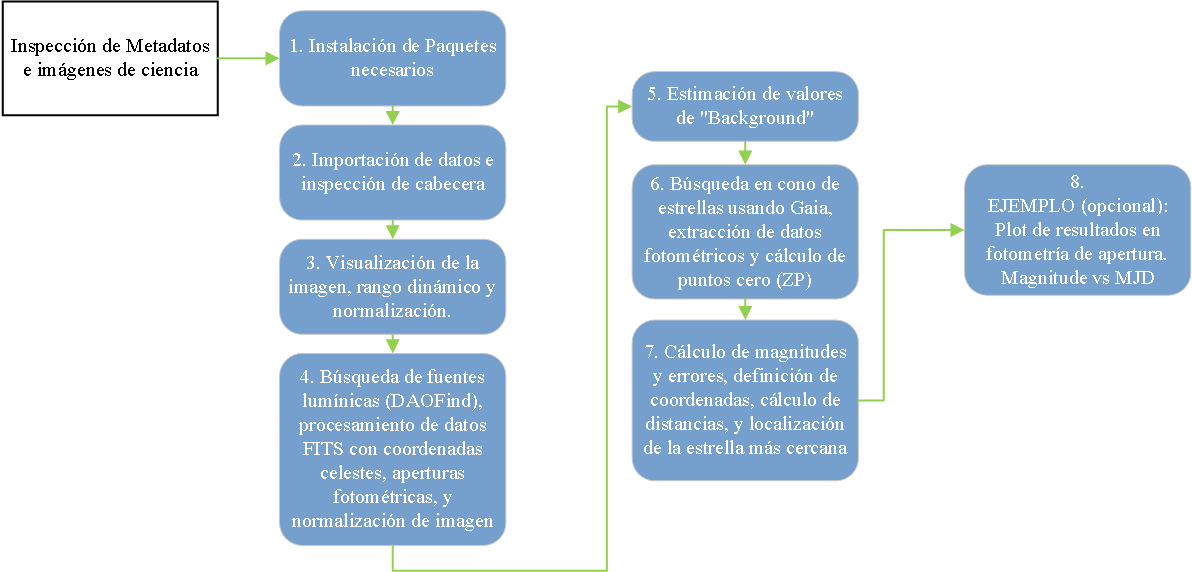

1. Instalación de librerias requeridas.

Un repositorio de Jupyter Notebook en funcionamiento requiere bibliotecas de datos relacionados, bases de datos dedicadas y funciones del procesamiento de Python 3.0 que se instalan en el entorno. El siguiente comando de instalación, se refiere a la actualización e instalación de varios paquetes principales para el análisis astronómico. `photutils` para análisis de imagen, `pytest-astropy` para pruebas, `astropy` para datos astronómicos, `matplotlib` para gráficos, `acstools` con datos de astronave Hubble y `astroquery` para consulta de la base de datos astronómica.

In [1]:
!pip install photutils pandas scipy pytest-astropy astropy matplotlib acstools astroquery --upgrade

  Using cached photutils-1.13.0-cp312-cp312-win_amd64.whl.metadata (6.6 kB)
  Using cached scipy-1.14.1-cp312-cp312-win_amd64.whl.metadata (60 kB)
  Using cached pytest_astropy-0.11.0-py3-none-any.whl.metadata (4.5 kB)
  Using cached astropy-6.1.3-cp312-cp312-win_amd64.whl.metadata (10 kB)
  Using cached matplotlib-3.9.2-cp312-cp312-win_amd64.whl.metadata (11 kB)
  Using cached acstools-3.7.1-py3-none-any.whl.metadata (2.0 kB)
  Using cached astroquery-0.4.7-py3-none-any.whl.metadata (7.2 kB)
  Using cached pytest_doctestplus-1.2.1-py3-none-any.whl.metadata (17 kB)
  Using cached pytest_remotedata-0.4.1-py3-none-any.whl.metadata (5.6 kB)
  Using cached pytest_astropy_header-0.2.2-py3-none-any.whl.metadata (8.5 kB)
  Using cached pytest_arraydiff-0.6.1-py3-none-any.whl.metadata (8.5 kB)
  Using cached pytest_filter_subpackage-0.2.0-py2.py3-none-any.whl.metadata (2.8 kB)
  Using cached pytest_cov-5.0.0-py3-none-any.whl.metadata (27 kB)
  Using cached pytest_mock-3.14.0-py3-none-any.whl.m

2. Importación de datos e inspección de cabecera
   
En astrofísica es muy común la utilización de archivos .fits provenientes de la adquisición de datos del telescopio e instrumento. La imagen, contiene información de importancia en el header del archivo. Esta parte se encarga de leer y procesar un archivo FITS (Flexible Image Transport System). Primero, se importan las librerías necesarias para manipular los archivos FITS, los datos tabulares y presentar los resultados en forma de tabla HTML en un ambiente Jupyter Notebook. Luego, crea una lista para almacenar las claves y los valores del encabezado y establece la ruta del archivo FITS. Para facilitar su análisis, abre el archivo, extrae el encabezado de la primera extensión, guarda las claves y los valores en una lista y muestra este DataFrame en formato tabular.

In [186]:
# ACCIÓN: PARAMETRIZACIÓN

#---------2.- Definición de Ruta y Inicialización de Variables---------
# Ruta al archivo FITS
file_path = 'D:/1. Bolivian Virtual Observatory (BVO)/coj0m421-sq37-20240829-0110-e91.fits'

In [187]:
#---------1.- Importación de Librerías---------
from astropy.io import fits
import pandas as pd
from astropy.coordinates import Angle
from astropy import units as u
from IPython.display import display, HTML
import numpy as np

# Lista para almacenar las claves y valores del encabezado
header_list = []
    
#---------2.- Procesamiento del Archivo FITS---------
# Abrir el archivo FITS
with fits.open(file_path) as hdul:
    # Obtener el encabezado de la primera extensión
    header = hdul[0].header
    data = hdul[0].data
    
    # Extraer los valores específicos
    origname = header.get('ORIGNAME', 'No disponible')
    project = header.get('GROUPID',  'No disponible')
    mjd_obs = header.get('MJD-OBS', 'No disponible')
    exptime = header.get('EXPTIME', 'No disponible')
    filter1 = header.get('FILTER1', 'No disponible')
    location = header.get('SITE', 'No disponible')
    
    # Extraer y convertir RA y DEC a formato decimal
    ra = header.get('RA', 'No disponible')
    dec = header.get('DEC', 'No disponible')

    important_data = {
        'Clave': ['ORIGNAME', 'GROUPID', 'MJD-OBS', 'EXPTIME', 'FILTER1', 'LOCATION', 'RA - IMAGEN (deg)', 'DEC - IMAGEN (deg)'],
        'Valor': [origname, project, mjd_obs, exptime, filter1, location, ra_decimal, dec_decimal]
    }
    important_df = pd.DataFrame(important_data)

    # Mostrar la tabla con los valores específicos
    display(HTML("<h3>DATOS DE IMPORTANCIA EN LA CABECERA:</h3>"))
    display(HTML(important_df.to_html(index=False)))

    # Guardar las claves y valores del encabezado en la lista
    for key in list(header.keys())[:30]:  # Puedes limitar si quieres a las primeras 20 claves
        header_list.append((key, header[key]))

# Crear un DataFrame con la lista de claves y valores
header_df = pd.DataFrame(header_list, columns=['Clave', 'Valor'])

# Mostrar el DataFrame de manera más visual estilo tabla de Excel
display(HTML("<h3>CABECERA COMPLETA:</h3>"))
display(HTML(header_df.to_html(index=False)))


In [189]:
# ACCIÓN: PARAMETRIZACIÓN 
#  La Coordenadas de RA y DEC se las deben asignar específicamente para nuestro objeto celestes de estudio. /Las anteriores son de la Imagen)
ob_ra = 302.724469875     # Coordenada (decimal): Ascensión Recta
ob_de = -27.4591675625   #Coordenada (decimal): Declinación 
exptime = 120      # Tiempo de exposición en segundos

3. Visualización de la imagen, rango dinámico y normalización.

Esta sección se ocupa de mostrar los datos de un archivo FITS. Las librerías necesarias para la visualización (`matplotlib`), la normalización de imágenes (`astropy.visualization`) y la lectura de archivos FITS (`astropy.io.fits`). En primer lugar se importan los paquetes necesarios. Luego, se extrae los datos de la imagen y establece la ruta al archivo FITS, que se indica en el código. Para mejorar la visualización, se establecen los parámetros de normalización de la imagen mediante un estiramiento de tipo raíz cuadrada. Por último, se crea y exhibe una imagen con la normalización empleada, con una escala de colores particular y una barra de color para determinar la intensidad.

In [190]:
# ACCIÓN: PARAMETRIZACIÓN
vmin = 10  # o algún valor pequeño que represente el ruido de fondo
vmax = np.percentile(data, 99)  # ajusta según sea necesario

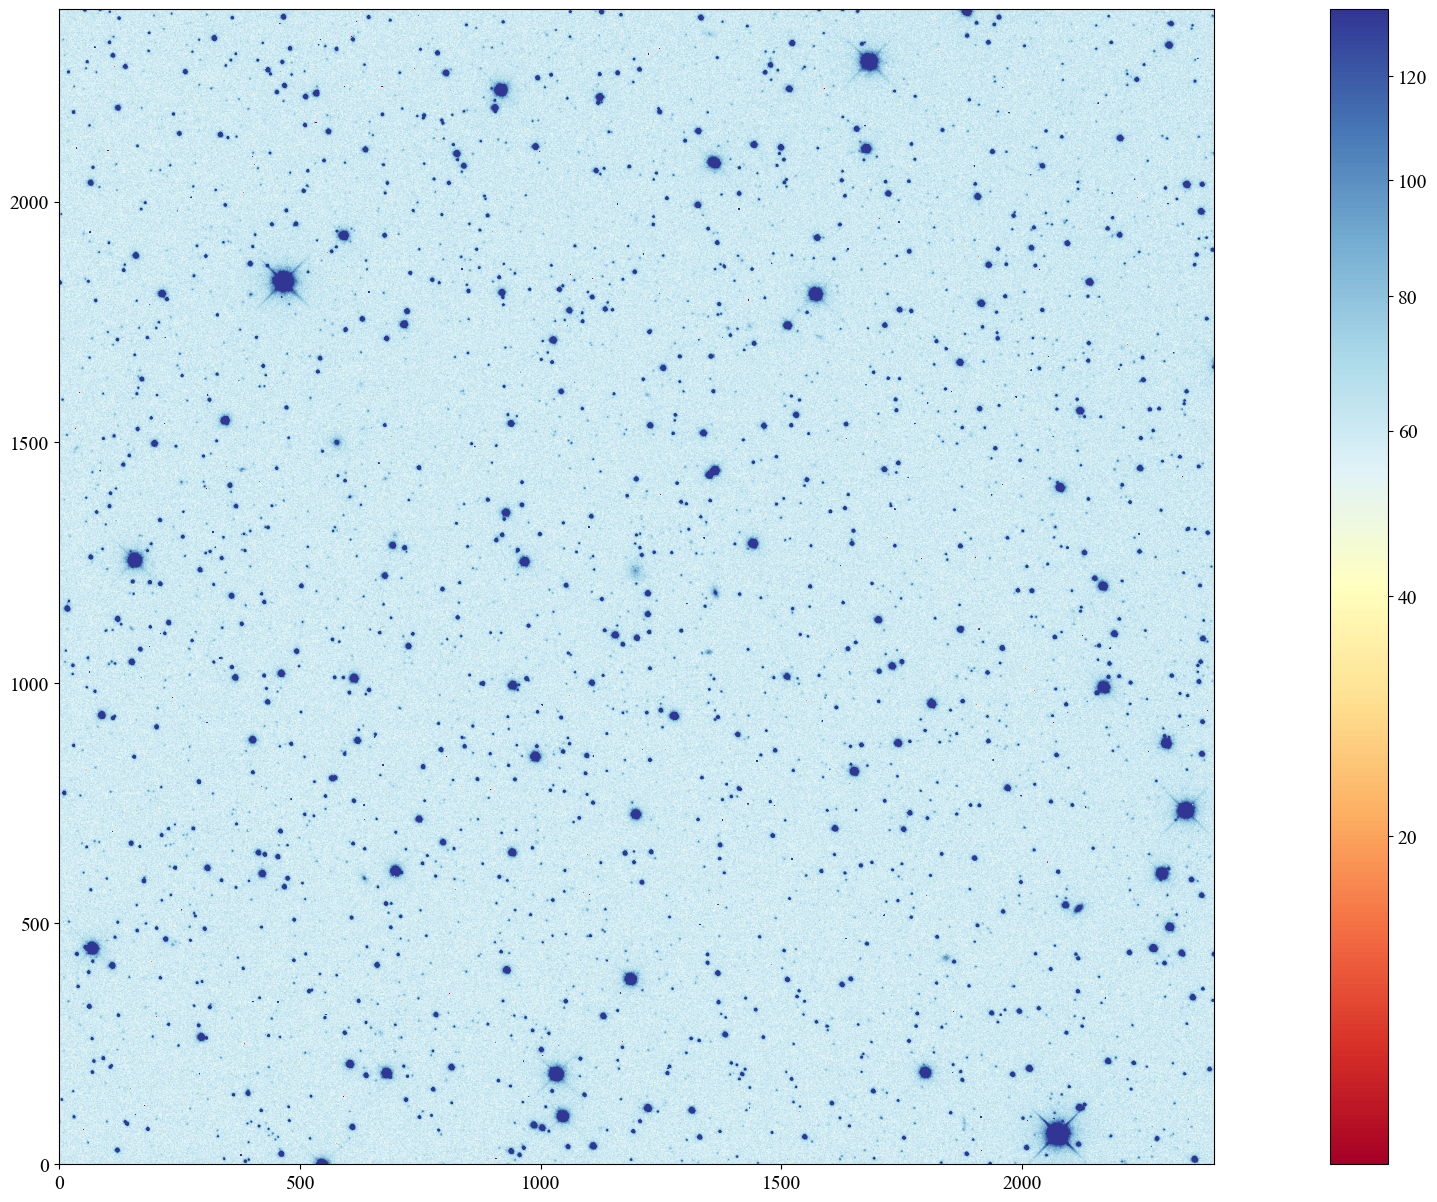

In [191]:
#---------1.- Importación de Librerías---------
import matplotlib.pyplot as plt
from astropy.visualization import SqrtStretch, ImageNormalize
from astropy.io import fits
import numpy as np

#---------3.- Visualización de Datos---------
# Crear la normalización con límites manuales y estiramiento sqrt
norm = ImageNormalize(vmin=vmin, vmax=vmax, stretch=SqrtStretch())

# Visualizar los datos con el estiramiento aplicado
plt.figure(figsize=(30, 15))
plt.imshow(data, cmap='RdYlBu', norm=norm, origin='lower')
plt.colorbar()
plt.show()


4. Búsqueda de fuentes lumínicas (DAOFind), procesamiento de datos FITS con coordenadas celestes, aperturas fotométricas, y normalización de imagen

Este proceso se centra en identificar y analizar fuentes lumínicas en una imagen astronómica y en la visualización de estas fuentes utilizando técnicas avanzadas de fotometría y normalización de imágenes.

Primero, se importan las librerías necesarias, como `numpy` y `IPython.display` para el manejo de datos numéricos y visualización en Jupyter Notebook, `astropy.stats` para el análisis estadístico, `photutils.datasets` para la carga de conjuntos de datos de imágenes, y `photutils.detection` para la detección de estrellas. También se utilizan `matplotlib` para la visualización de imágenes, `astropy.visualization` para la normalización, y `photutils.aperture` para la fotometría de aperturas. Además, se emplean `astropy.coordinates`, `astropy.wcs`, y `astropy.io.fits` para la manipulación de coordenadas celestes y la lectura de archivos FITS. Luego, se cargan los datos de un archivo FITS y se extraen tanto los datos de imagen como la cabecera, creando un objeto WCS que permite la conversión de coordenadas celestes a píxeles en la imagen. A partir de estos datos, se calculan las estadísticas de fondo, como la media, mediana y desviación estándar.

El siguiente paso es aplicar el algoritmo DAOStarFinder para identificar las fuentes estelares en la imagen. Se calcula la relación señal-ruido (SNR) de las fuentes identificadas, así como el error en la magnitud asociado a cada fuente. Esta información se organiza en una tabla, la cual se formatea y visualiza en HTML. Finalmente, se procede a la visualización de la imagen con las fuentes identificadas. Se definen aperturas circulares y anillos para la fotometría alrededor de las fuentes y en una nueva posición basada en coordenadas celestes. Se normaliza la imagen para mejorar su visualización, y se superponen las aperturas y los anillos sobre la imagen. El resultado final se muestra como una imagen visualmente enriquecida con las aperturas y anillos destacados.

In [192]:
# ACCIÓN: PARAMETRIZACIÓN
sigma = 3
fwhm = 3.0
threshold = 4.0 

Set OBSGEO-B to   -31.272819 from OBSGEO-[XYZ].
Set OBSGEO-H to     1126.993 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


Posición del objeto celeste: xpix = 1197.68571249968294978316 [pix], ypix: 1205.60643563397366051504 [pix]
Mean: 60.24637603759765625000, Median: 60.02235412597656250000, Std Dev: 8.83152770996093750000
Fuente más cercana a las coordenadas dadas:
Posición (x, y): (1198.26, 1205.54)
Magnitud: -0.50
Error de magnitud: 0.86


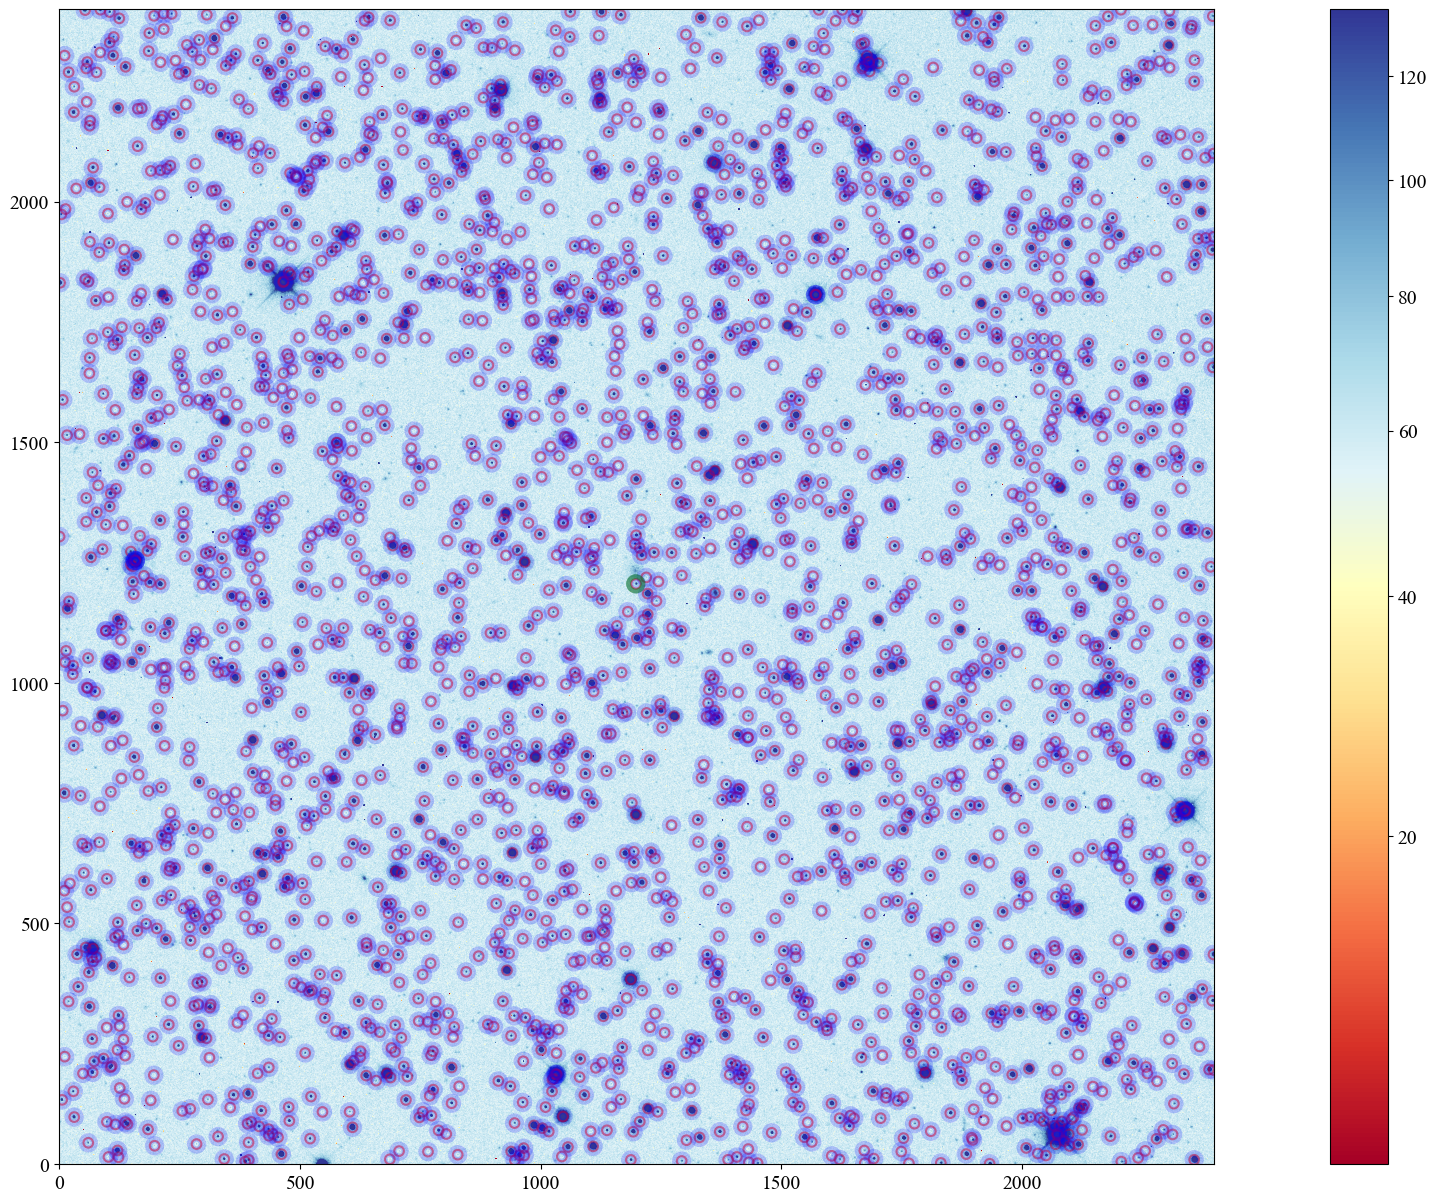

<b>Fuente más cercana:</b><br>Posición (x, y): (1198.26, 1205.54)<br>Magnitud: -0.50<br>Error de magnitud: 0.86


In [193]:
#---------1.- Importación de Librerías---------
import numpy as np
import matplotlib.pyplot as plt
from astropy.visualization import SqrtStretch
from astropy.visualization.mpl_normalize import ImageNormalize
from photutils.aperture import CircularAperture, CircularAnnulus, ApertureStats, aperture_photometry
from astropy.coordinates import SkyCoord
from astropy.wcs import WCS
from astropy.io import fits
from astropy.stats import sigma_clipped_stats
from photutils.datasets import load_star_image
from photutils.detection import DAOStarFinder
from IPython.display import display, HTML

#---------2.- Cargar datos FITS y cabecera---------
# Leer el archivo FITS y extraer los datos
with fits.open(file_path) as hdul:
    data = hdul[0].data
    
# Crear el objeto WCS a partir de la cabecera
wcs = WCS(header)

#---------3.- Definir coordenadas del objeto y convertir a píxeles---------
ra_dec_positions = SkyCoord(ob_ra, ob_de, unit='deg', frame='icrs')
pixel_positions = np.array(ra_dec_positions.to_pixel(wcs)).T
print(f"Posición del objeto celeste: xpix = {pixel_positions[0]:.20f} [pix], ypix: {pixel_positions[1]:.20f} [pix]")  

#---------4.- Estadísticas de fondo ---------
mean, median, std = sigma_clipped_stats(data, sigma=sigma)  
print(f"Mean: {mean:.20f}, Median: {median:.20f}, Std Dev: {std:.20f}")  

#---------5.- Búsqueda de fuentes ---------
daofind = DAOStarFinder(fwhm=fwhm, threshold=threshold*std)  
sources = daofind(data - median)  

# Podemos estimar la SNR como el flujo dividido por la raíz cuadrada del flujo (para una simple estimación de error de Poisson).
snr = sources['flux'] / np.sqrt(sources['flux'])

# Si el flujo es muy bajo, puede resultar en SNR infinitamente grande, así que limitamos:
snr = np.where(snr > 0, snr, 1)  # Evitamos valores nulos o negativos

# Ahora calculamos el error de magnitud basado en la SNR
mag_error = 2.5 / np.log(10) * (1 / snr)

# Agrega la columna 'mag_err' (desviación estándar de magnitud) a la tabla
sources['mag_err'] = mag_error

# Da formato a las columnas para la impresión
for col in sources.colnames:  
    if col not in ('id', 'npix'):
        sources[col].info.format = '%.2f'  # para consistencia en la salida de la tabla

#---------6.- Cargar posiciones de las fuentes, crear aperturas circulares y anillos---------
positions = np.transpose((sources['xcentroid'], sources['ycentroid']))
apertures = CircularAperture(positions, r=10.0)

# Crear aperturas circulares adicionales en las nuevas posiciones
additional_apertures = CircularAperture(pixel_positions, r=15.0)
# define anillos
annulus_aperture = CircularAnnulus(positions, r_in=10, r_out=15)

#---------7.1.- Calcular la distancia de las fuentes a la posición de interés---------
# Calcular distancias de cada fuente detectada a las coordenadas del objeto de interés
distances = np.sqrt((sources['xcentroid'] - pixel_positions[0])**2 + (sources['ycentroid'] - pixel_positions[1])**2)

# Encontrar la fuente más cercana
closest_idx = np.argmin(distances)
closest_source = sources[closest_idx]

# Extraer los valores de interés
closest_flux = closest_source['flux']
closest_mag_err = closest_source['mag_err']

# Calcular la magnitud de la fuente más cercana
closest_magnitude = -2.5 * np.log10(closest_flux)

print(f"Fuente más cercana a las coordenadas dadas:")
print(f"Posición (x, y): ({closest_source['xcentroid']:.2f}, {closest_source['ycentroid']:.2f})")
print(f"Magnitud: {closest_magnitude:.2f}")
print(f"Error de magnitud: {closest_mag_err:.2f}")

#---------7.- Visualizar los datos con el estiramiento aplicado---------
plt.figure(figsize=(30, 15))
plt.imshow(data, cmap='RdYlBu', norm=norm, origin='lower')
plt.colorbar()

# Plotear aperturas originales
apertures.plot(color='red', lw=1.5, alpha=0.5)

# Plotear Anillos
annulus_aperture.plot(color='blue',lw=3.5,alpha=0.2);

# Plotear aperturas adicionales
additional_apertures.plot(color='green', lw=3.5, alpha=0.5)

plt.show()

#---------7.2.- Mostrar la información de la fuente más cercana---------
print(f"<b>Fuente más cercana:</b><br>Posición (x, y): ({closest_source['xcentroid']:.2f}, {closest_source['ycentroid']:.2f})<br>Magnitud: {closest_magnitude:.2f}<br>Error de magnitud: {closest_mag_err:.2f}")

#---------8.- Mostrar la tabla como HTML---------
html_table = sources._repr_html_()

# Mostrar la tabla como HTML en un entorno compatible
display(HTML(html_table))



5. Estimación de valores de "Background"

Se realiza fotometría de aperturas en una imagen astronómica. Se calcula el fondo en una región de anillo alrededor de las aperturas, ajusta los valores de fondo para cada apertura, y realiza la fotometría. Luego, se añade el fondo total a los datos de fotometría, se formatea la tabla de resultados y se lo muestra en formato HTML.

In [197]:
#---------1.- Importación de Librerías---------
from photutils.aperture import ApertureStats, aperture_photometry
from IPython.display import display, HTML

#---------1.- Definir el fondo---------
aperstats = ApertureStats(data, annulus_aperture)
bkg_mean = aperstats.mean
aperture_area = apertures.area_overlap(data)
total_bkg = bkg_mean * aperture_area

#---------2.- Realizar fotometría de apertura---------
star_data = aperture_photometry(data, apertures)

#---------3.- Añadir fondos a la tabla---------
star_data['total_bkg'] = total_bkg

#---------4.- Formatear e imprimir los datos---------
for col in star_data.colnames:
    star_data[col].info.format = '%.8g'

# Convertir la tabla en una representación HTML
html_table = star_data._repr_html_()

# Mostrar la tabla como HTML en un entorno compatible
display(HTML(html_table))


6. Búsqueda en cono de estrellas usando Gaia, extracción de datos fotométricos y cálculo de puntos cero (ZP).

Se realiza una búsqueda en el catálogo Gaia para obtener datos fotométricos de un objeto astronómico específico. Primero, se importa las librerías necesarias para consultar al catalogo Gaia (`astroquery`), manejar coordenadas (`astropy.coordinates`), y mostrar resultados en Jupyter Notebook (`IPython.display`). Luego, se define las coordenadas del objeto de interés y el radio para la búsqueda en cono. Se realiza una consulta en el catálogo Gaia para obtener las fuentes dentro del radio especificado y muestra las primeras cinco filas de resultados. Se extrae y muestra los datos fotométricos promedio (magnitudes G, BP y RP) para estas fuentes. Finalmente, se calcula y muestra los puntos cero (ZP) para cada filtro fotométrico, proporcionando una estimación simplificada.

In [202]:
#---------1.- Importación de Librerías---------
from astroquery.gaia import Gaia
import astropy.units as u
from astropy.coordinates import SkyCoord
from IPython.display import display, HTML

#---------2.- Definir las coordenadas del objeto de interés---------
coord = SkyCoord(ra=ob_ra * u.degree, dec=ob_de * u.degree, frame='icrs')

#---------3.- Definir el radio para la búsqueda en cono---------
radius = 0.25 * u.deg  # 0.5 grados

#---------4.- Realizar la búsqueda en cono---------
query = f"""
SELECT * 
FROM gaiadr3.gaia_source 
WHERE CONTAINS(POINT('ICRS', ra, dec), CIRCLE('ICRS', {ob_ra}, {ob_de}, {radius.to(u.deg).value}))=1
"""
job = Gaia.launch_job_async(query)
results = job.get_results()

#---------5.- Mostrar resultados para inspeccionar los datos (primeras 5 filas)---------
display(HTML(results[:5]._repr_html_()))

#---------6.- Extraer datos fotométricos (primeras 5 filas)---------
phot_g_mean_mag = results['phot_g_mean_mag'][:5]
phot_bp_mean_mag = results['phot_bp_mean_mag'][:5]
phot_rp_mean_mag = results['phot_rp_mean_mag'][:5]

#---------7.- Mostrar datos fotométricos---------
phot_table = f"""
<table>
    <tr><th>G mean magnitude</th><th>BP mean magnitude</th><th>RP mean magnitude</th></tr>
    <tr><td>{phot_g_mean_mag}</td><td>{phot_bp_mean_mag}</td><td>{phot_rp_mean_mag}</td></tr>
</table>
"""
display(HTML(phot_table))

#---------8.- Calcular el punto cero para cada filtro (ejemplo simplificado)---------
# Nota: Este es un ejemplo simplificado. El cálculo real podría necesitar constantes de calibración.
zero_point_g = phot_g_mean_mag.mean()
zero_point_bp = phot_bp_mean_mag.mean()
zero_point_rp = phot_rp_mean_mag.mean()

#---------9.- Mostrar los puntos cero---------
zero_point_table = f"""
<table>
    <tr><th>Filter</th><th>Zero Point (ZP)</th></tr>
    <tr><td>G</td><td>{zero_point_g:.4f}</td></tr>
    <tr><td>BP</td><td>{zero_point_bp:.4f}</td></tr>
    <tr><td>RP</td><td>{zero_point_rp:.4f}</td></tr>
</table>
"""
display(HTML(zero_point_table))


INFO: Query finished. [astroquery.utils.tap.core]


7. Cálculo de magnitudes y errores, definición de coordenadas, cálculo de distancias, y localización de la estrella más cercana.

Esta parte se encarga de calcular y analizar magnitudes estelares y distancias para un conjunto de datos. Primero, se importa las librerías necesarias (`numpy`, `math`, `astropy.table`, `IPython.display`). Luego, se define los parámetros iniciales, como el punto cero (ZP) para la magnitud y el tiempo de exposición. Se calcula las magnitudes y errores de magnitud para cada estrella en los datos, ajustando por el fondo y el tiempo de exposición. A continuación, se añade estas magnitudes y errores a la tabla de datos. Después, se define coordenadas objetivo en píxeles y calcula las distancias euclidianas de cada estrella a estas coordenadas. Se añade estas distancias a la tabla y muestra los datos actualizados. Finalmente, se identifica y muestra la estrella más cercana al objetivo, mostrando sus detalles en una tabla HTML.

In [203]:
# ACCIÓN: PARAMETRIZACIÓN 
zeropoint = 19.969 # Punto cero para la magnitud. Atención: Debe ajustarse con datos de catalogos complementarios a Gaia.

In [204]:
#---------1.- Importación de Librerías---------
import numpy as np
import math
from astropy.table import Table
from IPython.display import display, HTML

#---------2.- Calcular Magnitudes y Error de Magnitud---------
magnitudes = []
mag_errors = []

for line in star_data:
    # Calcular magnitud para cada estrella usando la columna 'aperture_sum' en lugar de 'flux'
    # y 'total_bkg' en lugar de 'background'
    flux = line['aperture_sum'] - line['total_bkg']
    magnitude = zeropoint - (2.5 * math.log10(abs(flux) / exptime))
    magnitudes.append(magnitude)
    
    # Calcular SNR (relación señal/ruido)
    snr = flux / np.sqrt(line['aperture_sum'])  # Considera solo el flujo sin el fondo
    
    # Evitar valores nulos o negativos en SNR
    if snr <= 0:
        snr = 1
    
    # Calcular error de magnitud
    mag_error = 2.5 / np.log(10) * (1 / snr)
    mag_errors.append(mag_error)

# Añadir magnitudes y errores de magnitud a la tabla
star_data['magnitude'] = magnitudes
star_data['mag_error'] = mag_errors

#---------3.- Definir Coordenadas del Objeto Celeste---------
target_coords = np.array([pixel_positions[0], pixel_positions[1]])  # Coordenadas objetivo en píxeles

#---------4.- Función para Calcular Distancia Euclidiana---------
def euclidean_distance(coord1, coord2):
    """
    Calcula la distancia euclidiana entre dos coordenadas.
    """
    return np.sqrt(np.sum((coord1 - coord2) ** 2))

#---------5.- Calcular Distancias---------
# Lista para almacenar las distancias
distances = []

# Calcular distancias para cada estrella en la tabla
for star in star_data:
    # Extraer valores numéricos de las coordenadas eliminando las unidades
    star_coords = np.array([star['xcenter'].value, star['ycenter'].value])
    distance = euclidean_distance(target_coords, star_coords)
    distances.append(distance)

# Añadir las distancias a la tabla de datos
star_data['distance'] = distances

#---------6.- Encontrar y Mostrar la Estrella Más Cercana---------
# Encontrar el índice de la estrella con la distancia mínima
closest_star_index = np.argmin(distances)
closest_star = star_data[closest_star_index]

# Crear una tabla HTML con la información de la estrella más cercana
closest_star_table = f"""
<table>
    <tr><th>Atributo</th><th>Valor</th></tr>
    <tr><td>Índice</td><td>{closest_star_index + 1}</td></tr>
    <tr><td>Coordenadas (xcenter, ycenter)</td><td>{closest_star['xcenter']}, {closest_star['ycenter']}</td></tr>
    <tr><td>Distancia</td><td>{closest_star['distance']:.4f}</td></tr>
    <tr><td>Magnitud</td><td>{closest_star['magnitude']:.4f}</td></tr>
    <tr><td>Error de Magnitud</td><td>{closest_star['mag_error']:.4f}</td></tr>
</table>
"""

# Mostrar la información de la fuente mas cercana a nuestro objeto celeste en formato HTML
display(HTML(closest_star_table))

# Mostrar los datos actualizados con distancias como HTML
display(HTML(star_data._repr_html_()))


8. EJEMPLO (opcional): Plot de resultados en fotometría de apertura. Magnitude vs MJD.

Se importa librerías para graficar datos y manejar fechas, donde se definen varios conjuntos de datos de magnitudes y errores para diferentes observatorios y filtros, y usa colores específicos para cada filtro. La función `plot_data()` extrae y grafica estos datos, incluyendo barras de error, con personalización en colores y marcadores. Finalmente, se genera un gráfico comparativo con etiquetas y una leyenda, mostrando magnitudes frente a fechas y ajustando el eje y para inversión, proporcionando una visualización clara de los datos fotométricos.

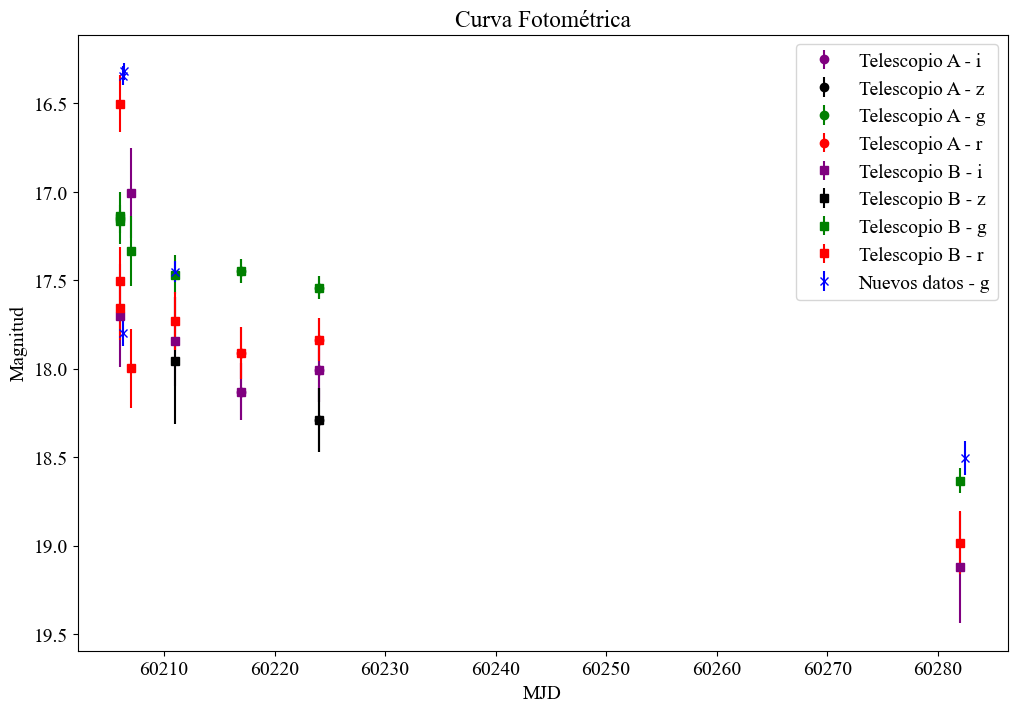

In [130]:
#---------1.- Importación de Librerías---------
import matplotlib.pyplot as plt
from datetime import datetime
from astropy.time import Time

plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 14  # Define el tamaño de la fuente aquí

#---------2.- Datos de Observaciones - IAC80---------
# Telescopio A
data1 = [
    ('g', 17.4465, 0.066313, '30/09/23'),
    ('r', 17.9111, 0.145501, '30/09/23'),
    ('i', 18.1306, 0.160799, '30/09/23'),
    ('g', 17.5424, 0.065164, '07/10/23'),
    ('r', 17.8354, 0.120038, '07/10/23'),
    ('i', 18.0045, 0.18543, '07/10/23'),
    ('z', 18.2896, 0.179689, '07/10/23'),
]

#---------3.- Datos de Observaciones - LCO---------
# Telescopio B
data2 = [
    ('g', 17.1387, 0.065504, '19/09/23'),
    ('r', 16.50033, 0.163263, '19/09/23'),
    ('g', 17.1458, 0.147975, '19/09/23'),
    ('r', 17.5026, 0.193064, '19/09/23'),
    ('g', 17.1667, 0.0634, '19/09/23'),
    ('r', 17.6591, 0.177887, '19/09/23'),
    ('i', 17.6995, 0.291464, '19/09/23'),
    ('g', 17.3341, 0.199078, '20/09/23'),
    ('r', 17.9976, 0.225018, '20/09/23'),
    ('i', 17.0077, 0.253974, '20/09/23'),
    ('g', 17.4686, 0.110465, '24/09/23'),
    ('r', 17.7296, 0.165102, '24/09/23'),
    ('i', 17.8439, 0.25196, '24/09/23'),
    ('z', 17.9534, 0.36095, '24/09/23'),
    ('g', 18.633, 0.069477, '04/12/23'),
    ('r', 18.9848, 0.177824, '04/12/23'),
    ('i', 19.1234, 0.31248, '04/12/23'),
    ('g', 17.4465, 0.066313, '30/09/23'),
    ('r', 17.9111, 0.145501, '30/09/23'),
    ('i', 18.1306, 0.160799, '30/09/23'),
    ('g', 17.5424, 0.065164, '07/10/23'),
    ('r', 17.8354, 0.120038, '07/10/23'),
    ('i', 18.0045, 0.18543, '07/10/23'),
    ('z', 18.2896, 0.179689, '07/10/23'),
]

#---------4.- Datos de Observaciones - Nueva Tanda de Datos---------
# Nuevos datos
new_data3 = [
    ('g', 16.3424, 0.052, 60206.3009),
    ('g', 17.7973, 0.076, 60206.3106),
    ('g', 16.3175, 0.048, 60206.3487),
    ('g', 18.507, 0.096, 60282.4850),
    ('g', 17.45, 0.059, 60211.0333), # último dato añadido
]

#---------5.- Definición de Colores para Filtros---------
# Define un diccionario para colores específicos de filtros
filter_colors = {
    'g': 'green',
    'r': 'red',
    'i': 'purple',
    'z': 'black',
}

#---------6.- Función para Graficar Datos---------
def plot_data(data, marker, base_color, label, specific_color=None):
    # Extraer filtros únicos
    filters = set(d[0] for d in data)
    for filt in filters:
        # Extraer datos para el filtro específico
        filt_data = [(d[1], d[2], d[3]) if len(d) > 3 else (d[1], d[2], None) for d in data if d[0] == filt]
        # Filtrar entradas con valores None para MJD
        filt_data = [d for d in filt_data if d[2] is not None]

        if filt_data and isinstance(filt_data[0][2], float):
            # Los datos están en formato MJD
            magnitudes = [d[0] for d in filt_data]
            errores = [d[1] for d in filt_data]
            fechas_mjd = [float(d[2]) for d in filt_data]
            fechas = fechas_mjd  # Usar MJD directamente para el eje x
        else:
            # Los datos tienen cuatro elementos, es el formato de fecha en cadena
            fechas = [Time(datetime.strptime(d[2], '%d/%m/%y')).mjd for d in filt_data]
            magnitudes = [d[0] for d in filt_data]
            errores = [d[1] for d in filt_data]

        # Usar el color específico si se proporciona, de lo contrario, el color específico del filtro o el color base
        color = specific_color if specific_color else filter_colors.get(filt, base_color)

        # Graficar datos con barras de error
        ax.errorbar(
            fechas,
            magnitudes,
            yerr=errores,
            fmt=marker,
            label=f'{label} - {filt}',
            color=color
        )

#---------7.- Creación de Gráfica---------
# Ejemplo de uso de gráfico con tamaño aumentado
fig, ax = plt.subplots(figsize=(12, 8))

#---------8.- Graficar Múltiples Conjuntos de Datos---------
# Graficar múltiples conjuntos de datos
plot_data(data1, 'o', 'blue', 'Telescopio A')
plot_data(data2, 's', 'green', 'Telescopio B')
plot_data(new_data3, 'x', 'orange', 'Nuevos datos', specific_color='blue')  # Asegurarse de que los nuevos datos se grafiquen en azul

#---------9.- Personalización de la Gráfica---------
# Personalizar gráfica
ax.set_xlabel('MJD')
ax.set_ylabel('Magnitud')
ax.set_title('Curva Fotométrica')
# Invertir el eje y
plt.gca().invert_yaxis()
ax.legend()

#---------10.- Mostrar la Gráfica---------
plt.show()
